In [1]:
import copy
import copyreg

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display_functions import display
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  MinMaxScaler
from sklearn.linear_model import LinearRegression


In [311]:
data_file = 'clean_data.csv'
df = pd.read_csv(data_file)
df.head()

# clean duplicate, strong correlation data drop none use columns

df = df.drop(['Unnamed: 0', 'classified_subtype', 'classified_transactionType', 'classified_visualisationOption', 'classified_specificities_SME_office_exists', 'classified_wellnessEquipment_hasSwimmingPool', 'classified_parking_parkingSpaceCount_indoor', 'new_price', 'bedroom_count'], axis=1)

df = df.fillna(0)
df = pd.DataFrame(df)
df = df.astype({'classified_certificates_primaryEnergyConsumptionLevel': 'int'})

# age of building
list_years = []
for year in df['classified_building_constructionYear']:
    years = 2022 - year
    list_years.append(years)
df = df.assign(construction_years = list_years)

#drop columns that not related
df = df.drop(['classified_id','classified_atticExists', 'classified_basementExists', 'classified_outdoor_garden_surface', 'classified_parking_parkingSpaceCount_outdoor', 'classified_outdoor_terrace_exists', 'classified_land_surface','classified_zip'], axis=1)
df = df[df.classified_building_constructionYear != 0]
df = df[df.classified_energy_heatingType != 0]
df = df[df.classified_energy_heatingType != 0]
df = df[df.classified_certificates_primaryEnergyConsumptionLevel != 0]


display(df)
display(df.columns)



,classified_type,classified_price,classified_kitchen_type,classified_building_constructionYear,classified_building_condition,classified_energy_heatingType,classified_certificates_primaryEnergyConsumptionLevel,classified_bedroom_count,classified_condition_isNewlyBuilt,classified_region,construction_years
0,apartment,339000,hyperequipped,2021.0,justrenovated,gas,1,2.0,1.0,Oost Vlaanderen,1.0
1,apartment,395000,hyperequipped,2022.0,justrenovated,gas,54,3.0,1.0,Brussels,0.0
2,apartment,965000,hyperequipped,2021.0,justrenovated,gas,55,3.0,1.0,Brussels,1.0
3,apartment,249000,installed,2010.0,good,gas,88,2.0,0.0,Vlaams Brabant,12.0
4,apartment,325000,hyperequipped,1967.0,justrenovated,gas,99,2.0,0.0,West Vlaanderen,55.0
...,...,...,...,...,...,...,...,...,...,...,...
19981,house,375000,semiequipped,1977.0,torenovate,gas,360,3.0,0.0,Brabant Wallonia,45.0
19982,house,375000,semiequipped,1968.0,torenovate,fueloil,880,4.0,0.0,Vlaams Brabant,54.0
19986,house,389000,hyperequipped,1985.0,good,gas,176,3.0,0.0,Antwerp,37.0
19987,house,395000,installed,1951.0,good,gas,212,3.0,0.0,Limburg,71.0


Index(['classified_type', 'classified_price', 'classified_kitchen_type',
       'classified_building_constructionYear', 'classified_building_condition',
       'classified_energy_heatingType',
       'classified_certificates_primaryEnergyConsumptionLevel',
       'classified_bedroom_count', 'classified_condition_isNewlyBuilt',
       'classified_region', 'construction_years'],
      dtype='object')

In [312]:

labelencoder = LabelEncoder()
df['classified_energy_heatingType'] = labelencoder.fit_transform(df['classified_energy_heatingType'])
df['classified_region'] = labelencoder.fit_transform(df['classified_region'])
df['classified_type'] = labelencoder.fit_transform(df['classified_type'])
df['classified_building_condition'] = labelencoder.fit_transform(df['classified_building_condition'])
df['classified_condition_isNewlyBuilt'] = labelencoder.fit_transform(df['classified_condition_isNewlyBuilt'])
df['classified_kitchen_type'] = labelencoder.fit_transform(df['classified_kitchen_type'])
df['classified_certificates_primaryEnergyConsumptionLevel'] = labelencoder.fit_transform(df['classified_certificates_primaryEnergyConsumptionLevel'])
df



,classified_type,classified_price,classified_kitchen_type,classified_building_constructionYear,classified_building_condition,classified_energy_heatingType,classified_certificates_primaryEnergyConsumptionLevel,classified_bedroom_count,classified_condition_isNewlyBuilt,classified_region,construction_years
0,0,339000,0,2021.0,1,3,0,2.0,1,8,1.0
1,0,395000,0,2022.0,1,3,39,3.0,1,2,0.0
2,0,965000,0,2021.0,1,3,40,3.0,1,2,1.0
3,0,249000,1,2010.0,0,3,73,2.0,0,9,12.0
4,0,325000,0,1967.0,1,3,84,2.0,0,10,55.0
...,...,...,...,...,...,...,...,...,...,...,...
19981,1,375000,3,1977.0,2,3,345,3.0,0,1,45.0
19982,1,375000,3,1968.0,2,2,790,4.0,0,9,54.0
19986,1,389000,0,1985.0,0,3,161,3.0,0,0,37.0
19987,1,395000,1,1951.0,0,3,197,3.0,0,5,71.0


In [313]:
# data visual
# for label in df.columns[1:]:
#     plt.ticklabel_format(style='plain')
#     plt.scatter(df[label], df['classified_price'])
#     plt.title(label)
#     plt.ylabel('classified_price')
#     plt.xlabel(label)
#     plt.show()


# Linear regression

In [307]:
X = np.array(df[['classified_bedroom_count','classified_kitchen_type','classified_type','classified_building_constructionYear','classified_condition_isNewlyBuilt']])
y = np.array(df['classified_price'])
np.corrcoef(X[:,1],y)
np.corrcoef(X[:,0],y)

array([[1.        , 0.45186355],
       [0.45186355, 1.        ]])

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=41,  test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [309]:
regression = LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_train, y_train)

0.24981313831315155

In [310]:
regression.predict(X_test)
regression.score(X_test, y_test)

0.20127078521829955

# KNN

In [314]:
X = np.array(df[['classified_bedroom_count','classified_kitchen_type','classified_type','construction_years','classified_condition_isNewlyBuilt','classified_building_condition', 'classified_certificates_primaryEnergyConsumptionLevel', 'classified_energy_heatingType', 'classified_region']])
y = np.array(df['classified_price'])
np.corrcoef(X[:,1],y)
np.corrcoef(X[:,0],y)

array([[1.        , 0.45186355],
       [0.45186355, 1.        ]])

In [315]:
df

,classified_type,classified_price,classified_kitchen_type,classified_building_constructionYear,classified_building_condition,classified_energy_heatingType,classified_certificates_primaryEnergyConsumptionLevel,classified_bedroom_count,classified_condition_isNewlyBuilt,classified_region,construction_years
0,0,339000,0,2021.0,1,3,0,2.0,1,8,1.0
1,0,395000,0,2022.0,1,3,39,3.0,1,2,0.0
2,0,965000,0,2021.0,1,3,40,3.0,1,2,1.0
3,0,249000,1,2010.0,0,3,73,2.0,0,9,12.0
4,0,325000,0,1967.0,1,3,84,2.0,0,10,55.0
...,...,...,...,...,...,...,...,...,...,...,...
19981,1,375000,3,1977.0,2,3,345,3.0,0,1,45.0
19982,1,375000,3,1968.0,2,2,790,4.0,0,9,54.0
19986,1,389000,0,1985.0,0,3,161,3.0,0,0,37.0
19987,1,395000,1,1951.0,0,3,197,3.0,0,5,71.0


In [316]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=41,  test_size=0.2)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)


array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>,
        <AxesSubplot: title={'center': '2'}>],
       [<AxesSubplot: title={'center': '3'}>,
        <AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '5'}>],
       [<AxesSubplot: title={'center': '6'}>,
        <AxesSubplot: title={'center': '7'}>,
        <AxesSubplot: title={'center': '8'}>]], dtype=object)

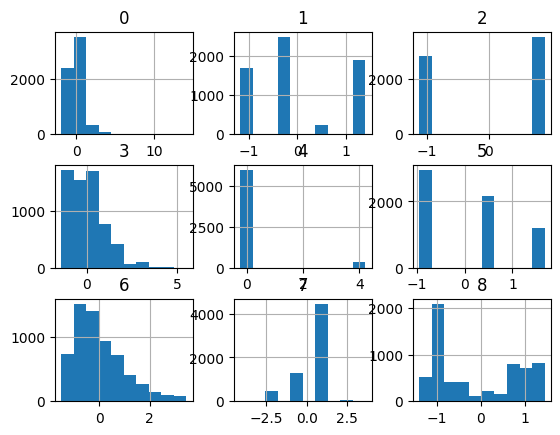

In [317]:
pd.DataFrame(X_train).hist()

In [318]:
from sklearn.neighbors import KNeighborsClassifier

In [319]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_model.score(X_train,y_train)

0.4115317598606051

In [ ]:
knn_model.predict(X_test)
knn_model.score(X_test, y_test)